In [1]:
import os, sys, inspect, io, pickle
import matplotlib.pyplot as plt
from math import floor
import keypoint_helpers
import state_helpers
from scipy.interpolate import spline
import numpy as np
import copy

with open('test.pickle', 'rb') as handle:
    kpts = pickle.load(handle)

kpts_inverted = state_helpers.invert_keypoints(kpts)

keypoints = keypoint_helpers.get_keypoint_labels()
kpt_dict_x = {
    'nose': [],
    'left_eye': [],
    'right_eye': [],
    'left_ear': [],
    'right_ear': [],
    'left_shoulder': [],
    'right_shoulder': [],
    'left_elbow': [],
    'right_elbow': [],
    'left_wrist': [],
    'right_wrist': [],
    'left_hip': [],
    'right_hip': [],
    'left_knee': [],
    'right_knee': [],
    'left_ankle': [],
    'right_ankle': []
}

kpt_dict_y = copy.deepcopy(kpt_dict_x)

time = list(range(len(kpts_inverted)))

for frame in kpts_inverted:
    for i, point in enumerate(frame):
        kpt_dict_x[keypoints[i]].append(point[0])
        kpt_dict_y[keypoints[i]].append(point[1])

# displacement
displacement = {}
for i, kpt in enumerate(keypoints):
    xsquared = np.square(np.asarray(kpt_dict_x[kpt]))
    ysquared = np.square(np.asarray(kpt_dict_y[kpt]))
    displacement[kpt] = np.sqrt(xsquared + ysquared)


# velocity / acceleration
velocity = {}
acceleration = {}
for i, kpt in enumerate(keypoints):
    velocity[kpt] = np.diff(displacement[kpt])/np.diff(time)
    acceleration[kpt] = np.diff(velocity[kpt])/np.diff(time[:-1])

Text(0,0.5,'|Y(freq)|')

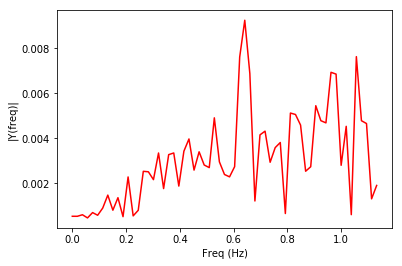

In [5]:
Fs = 2.30188679245  # sampling rate
Ts = 1.0/Fs # sampling interval


t = np.arange(0,len(kpts_inverted),Ts) # time vector
y = acceleration['left_hip']

n = len(y) # length of the signal
window = np.hamming(n)

k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(n//2)] # one side frequency range

Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(n//2)]

plt.plot(frq,abs(Y),'r') # plotting the spectrum
plt.xlabel('Freq (Hz)')
plt.ylabel('|Y(freq)|')

In [3]:
acceleration['left_hip']

array([-0.05374442,  0.04370007,  0.02204487,  0.00886073, -0.01161159,
        0.00976716, -0.0099895 , -0.02287761,  0.04749477, -0.00320992,
       -0.00832168, -0.0305669 , -0.00611664,  0.01919394,  0.00775054,
        0.04718256, -0.02576415, -0.00785492, -0.03548481,  0.00580292,
        0.05116121, -0.02012644,  0.00315681, -0.00264232, -0.01168793,
        0.04783736, -0.09115436,  0.02196975, -0.00057892, -0.03577748,
        0.04721268, -0.01634733,  0.04845416, -0.03021762,  0.0183127 ,
        0.01416675, -0.01385135, -0.02216022,  0.00541286,  0.0081735 ,
        0.02016376, -0.0298981 ,  0.01296211,  0.00336625, -0.00997274,
        0.02186528,  0.00202714, -0.01664922, -0.01427249,  0.00873589,
       -0.0264496 ,  0.01287715,  0.00739263, -0.02325212,  0.00354464,
        0.01950056,  0.0106323 , -0.01225008,  0.00141973,  0.04261757,
       -0.03604668,  0.01007246,  0.02882682, -0.07906378,  0.0411103 ,
       -0.01961383, -0.0051381 ,  0.01426884, -0.00084667,  0.02